# 波士顿房价预测案例——线性回归分析

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

dpath = './data/'
data = pd.read_csv(dpath + 'FE_boston_housing_try.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,...,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24,MEDV,log_MEDV
0,-0.417401,0.302696,-1.291856,-0.250812,-0.139895,0.505040,-0.109432,0.121208,-0.667101,-1.415179,...,0,0,0,0,0,0,0,0,0.300878,0.446452
1,-0.414992,-0.486479,-0.593329,-0.250812,-0.731821,0.269017,0.377488,0.537330,-0.988734,-0.516361,...,1,0,0,0,0,0,0,0,-0.004571,0.166718
2,-0.414995,-0.486479,-0.593329,-0.250812,-0.731821,1.439934,-0.255152,0.537330,-0.988734,-0.516361,...,1,0,0,0,0,0,0,0,1.662674,1.433933
3,-0.414412,-0.486479,-1.310933,-0.250812,-0.826186,1.153335,-0.798939,1.056878,-1.107857,-0.066953,...,0,1,0,0,0,0,0,0,1.497222,1.331120
4,-0.410202,-0.486479,-1.310933,-0.250812,-0.826186,1.381694,-0.500390,1.056878,-1.107857,-0.066953,...,0,1,0,0,0,0,0,0,1.853580,1.548010


In [5]:
y = data.MEDV
log_y = data.log_MEDV
X = data.drop(['MEDV', 'log_MEDV'], axis=1)
feat_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
X_train.shape

(392, 21)

## 缺省参数的线性回归

In [7]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_predict = lr_reg.predict(X_test)
lr_reg.score(X_test, y_test)

0.8069551816288218

In [36]:
from sklearn.model_selection import cross_val_score

mse_cv = cross_val_score(lr_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print(mse_cv)
print(mse_cv.mean()*(-1))

[-0.30726291 -0.27028767 -0.11800731 -0.1950786  -0.29422444 -0.27859879
 -0.32569919 -0.26498884 -0.16403131 -0.25421336]
0.24723924250093235


In [38]:
r2_cv = cross_val_score(lr_reg, X_train, y_train, cv=10, scoring='r2')
print(r2_cv)
print(r2_cv.mean())

[0.77552725 0.69666799 0.83383511 0.7218369  0.79801148 0.59038016
 0.72032688 0.7521432  0.73109022 0.78639722]
0.7406216417434295


In [8]:
# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
lr_reg.coef_

array([-0.13050737,  0.15498425, -0.02809411, -0.00985337, -0.14866117,
        0.2628706 , -0.09262156, -0.33830713, -0.21288868, -0.2061531 ,
        0.09561135, -0.34082239, -0.47929285, -0.14117792,  0.07398988,
       -0.11415381, -0.04847588, -0.29075388,  0.2188131 ,  0.43097976,
        0.3500716 ])

In [15]:
feat_coef = pd.DataFrame({'columns':list(feat_names), 'coef':list(lr_reg.coef_)})
feat_coef.sort_values(by=['coef'], ascending=False)

,columns,coef
19,RAD_8,0.430980
20,RAD_24,0.350072
5,RM,0.262871
18,RAD_7,0.218813
1,ZN,0.154984
10,B,0.095611
14,RAD_3,0.073990
3,CHAS,-0.009853
2,INDUS,-0.028094
16,RAD_5,-0.048476


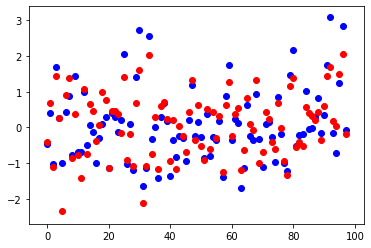

In [40]:
plt.scatter(range(len(y_test)), list(y_test), color='b')
plt.scatter(range(len(y_test)), list(y_predict), color='r')
plt.show()

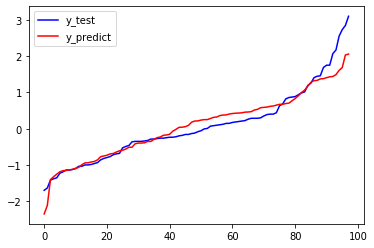

In [41]:
plt.plot(range(len(y_test)), sorted(y_test), color='b', label='y_test')
plt.plot(range(len(y_test)), sorted(y_predict), color='r', label='y_predict')
plt.legend()
plt.show()

可以看出，前半段拟合效果较好，后半段拟合效果较差

## 岭回归

In [43]:
from sklearn.linear_model import RidgeCV

alphas = np.linspace(0.01, 50, num=100)
ridge = RidgeCV(alphas=alphas, store_cv_values=True)
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 5.14949495e-01, 1.01989899e+00, 1.52484848e+00,
       2.02979798e+00, 2.53474747e+00, 3.03969697e+00, 3.54464646e+00,
       4.04959596e+00, 4.55454545e+00, 5.05949495e+00, 5.56444444e+00,
       6.06939394e+00, 6.57434343e+00, 7.07929293e+00, 7.58424242e+00,
       8.08919192e+00, 8.59414141e+00, 9.09909091e+00, 9.60404040e+00,
       1.01089899e+01, 1.06139394e+0...
       4.04059596e+01, 4.09109091e+01, 4.14158586e+01, 4.19208081e+01,
       4.24257576e+01, 4.29307071e+01, 4.34356566e+01, 4.39406061e+01,
       4.44455556e+01, 4.49505051e+01, 4.54554545e+01, 4.59604040e+01,
       4.64653535e+01, 4.69703030e+01, 4.74752525e+01, 4.79802020e+01,
       4.84851515e+01, 4.89901010e+01, 4.94950505e+01, 5.00000000e+01]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=True)

In [47]:
ridge.cv_values_.shape

(392, 100)

In [48]:
mse_mean = np.mean(ridge.cv_values_, axis=0)
mse_mean

array([0.24870733, 0.24839458, 0.2481807 , 0.24804484, 0.24797113,
       0.24794733, 0.24796386, 0.24801312, 0.24808905, 0.24818675,
       0.24830225, 0.24843228, 0.24857417, 0.24872571, 0.24888507,
       0.24905072, 0.24922139, 0.24939599, 0.24957365, 0.2497536 ,
       0.24993521, 0.25011796, 0.25030139, 0.25048512, 0.25066885,
       0.2508523 , 0.25103525, 0.25121752, 0.25139895, 0.25157943,
       0.25175884, 0.2519371 , 0.25211415, 0.25228993, 0.25246441,
       0.25263755, 0.25280934, 0.25297975, 0.2531488 , 0.25331647,
       0.25348277, 0.2536477 , 0.25381129, 0.25397354, 0.25413448,
       0.25429411, 0.25445247, 0.25460957, 0.25476544, 0.2549201 ,
       0.25507358, 0.25522589, 0.25537707, 0.25552714, 0.25567613,
       0.25582406, 0.25597096, 0.25611684, 0.25626175, 0.25640569,
       0.25654871, 0.25669081, 0.25683202, 0.25697238, 0.25711189,
       0.25725058, 0.25738847, 0.25752559, 0.25766196, 0.25779758,
       0.2579325 , 0.25806672, 0.25820026, 0.25833315, 0.25846

In [49]:
ridge.alpha_  # best alpha

2.5347474747474745

In [50]:
ridge.score(X_test, y_test)

0.8108655762007414

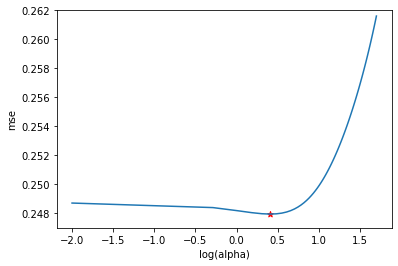

In [63]:
plt.plot(np.log10(alphas), mse_mean)
#plt.plot(np.log10(ridge.alpha_)*np.ones(3), [0.24, 0.24, 0.25])
plt.scatter(np.log10(ridge.alpha_), mse_mean[np.log10(alphas) == np.log10(ridge.alpha_)], c='r', marker='*')
plt.ylim([0.247, 0.262])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

In [64]:
fs = pd.DataFrame({"columns":list(feat_names), 
                   "coef_lr":list(lr_reg.coef_), 
                   "coef_ridge":list(ridge.coef_)})
fs.sort_values(by=['coef_lr'], ascending=False)

,columns,coef_lr,coef_ridge
19,RAD_8,0.430980,0.369360
20,RAD_24,0.350072,0.265701
5,RM,0.262871,0.269159
18,RAD_7,0.218813,0.189883
1,ZN,0.154984,0.142650
10,B,0.095611,0.093884
14,RAD_3,0.073990,0.083285
3,CHAS,-0.009853,-0.005911
2,INDUS,-0.028094,-0.039446
16,RAD_5,-0.048476,-0.042601


回归系数收缩

## LASSO

In [65]:
from sklearn.linear_model import LassoCV

lasso = LassoCV()
lasso.fit(X_train, y_train)

E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [66]:
lasso.score(X_test, y_test)

0.8083240165745612

In [67]:
lasso.alphas_

array([0.76481966, 0.71327337, 0.66520113, 0.6203688 , 0.57855802,
       0.53956515, 0.50320026, 0.46928625, 0.43765793, 0.40816125,
       0.38065255, 0.35499784, 0.33107217, 0.30875902, 0.28794969,
       0.26854285, 0.25044396, 0.23356487, 0.21782338, 0.20314281,
       0.18945167, 0.17668326, 0.1647754 , 0.15367009, 0.14331324,
       0.13365441, 0.12464655, 0.11624579, 0.10841121, 0.10110466,
       0.09429054, 0.08793568, 0.0820091 , 0.07648197, 0.07132734,
       0.06652011, 0.06203688, 0.0578558 , 0.05395651, 0.05032003,
       0.04692862, 0.04376579, 0.04081612, 0.03806525, 0.03549978,
       0.03310722, 0.0308759 , 0.02879497, 0.02685428, 0.0250444 ,
       0.02335649, 0.02178234, 0.02031428, 0.01894517, 0.01766833,
       0.01647754, 0.01536701, 0.01433132, 0.01336544, 0.01246465,
       0.01162458, 0.01084112, 0.01011047, 0.00942905, 0.00879357,
       0.00820091, 0.0076482 , 0.00713273, 0.00665201, 0.00620369,
       0.00578558, 0.00539565, 0.005032  , 0.00469286, 0.00437

In [68]:
lasso.alpha_

0.0007648196573237463

In [70]:
lasso.mse_path_[:3]

array([[0.90758798, 1.04636168, 0.98743898],
       [0.84841457, 1.02191575, 0.91599441],
       [0.79705692, 0.98092361, 0.85405254]])

In [71]:
lasso.mse_path_.shape  # (n_alphas, n_folds)

(100, 3)

In [73]:
mse = np.mean(lasso.mse_path_, axis=1)
mse[:5]

array([0.98046288, 0.92877491, 0.87734435, 0.82111412, 0.771886  ])

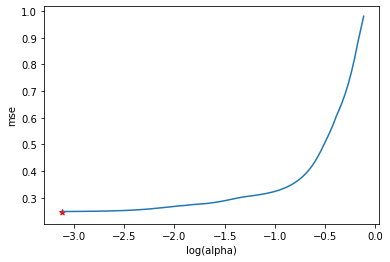

In [75]:
plt.plot(np.log10(lasso.alphas_), mse)
plt.scatter(np.log10(lasso.alpha_), mse[np.log10(lasso.alphas_) == np.log10(lasso.alpha_)], c='r', marker='*')
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()

In [76]:
fs = pd.DataFrame({'columns':list(feat_names), 
                  'coef_lr':list(lr_reg.coef_), 
                  'coef_ridge':list(ridge.coef_), 
                  'coef_lasso':list(lasso.coef_)})
fs.sort_values(by=['coef_lr'], ascending=False)

,columns,coef_lr,coef_ridge,coef_lasso
19,RAD_8,0.430980,0.369360,0.457131
20,RAD_24,0.350072,0.265701,0.355853
5,RM,0.262871,0.269159,0.265072
18,RAD_7,0.218813,0.189883,0.246153
1,ZN,0.154984,0.142650,0.149146
10,B,0.095611,0.093884,0.094096
14,RAD_3,0.073990,0.083285,0.117886
3,CHAS,-0.009853,-0.005911,-0.007402
2,INDUS,-0.028094,-0.039446,-0.033162
16,RAD_5,-0.048476,-0.042601,0.000000


In [77]:
print('The r2 score of LinearRegression on test:', 
      lr_reg.score(X_test, y_test))
print('The r2 score of RidgeCV on test:', 
      ridge.score(X_test, y_test))
print('The r2 score of LassoCV on test:', 
      lasso.score(X_test, y_test))

The r2 score of LinearRegression on test: 0.8069551816288218
The r2 score of RidgeCV on test: 0.8108655762007414
The r2 score of LassoCV on test: 0.8083240165745612


## 对标签y作log变换

In [81]:
data = pd.read_csv(dpath + 'FE_boston_housing_try.csv')

y = pd.DataFrame(data=data, columns=['MEDV', 'log_MEDV'])
X = data.drop(['MEDV', 'log_MEDV'], axis=1)
feat_names = X.columns

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666, test_size=0.2)
y_train.shape

(392, 2)

In [83]:
alphas = np.linspace(0.01, 50, num=100)
ridge1 = RidgeCV(alphas=alphas, store_cv_values=True)
ridge1.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-02, 5.14949495e-01, 1.01989899e+00, 1.52484848e+00,
       2.02979798e+00, 2.53474747e+00, 3.03969697e+00, 3.54464646e+00,
       4.04959596e+00, 4.55454545e+00, 5.05949495e+00, 5.56444444e+00,
       6.06939394e+00, 6.57434343e+00, 7.07929293e+00, 7.58424242e+00,
       8.08919192e+00, 8.59414141e+00, 9.09909091e+00, 9.60404040e+00,
       1.01089899e+01, 1.06139394e+0...
       4.04059596e+01, 4.09109091e+01, 4.14158586e+01, 4.19208081e+01,
       4.24257576e+01, 4.29307071e+01, 4.34356566e+01, 4.39406061e+01,
       4.44455556e+01, 4.49505051e+01, 4.54554545e+01, 4.59604040e+01,
       4.64653535e+01, 4.69703030e+01, 4.74752525e+01, 4.79802020e+01,
       4.84851515e+01, 4.89901010e+01, 4.94950505e+01, 5.00000000e+01]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=True)

In [100]:
print(ridge1.coef_.shape)
ridge1.coef_

(2, 21)


array([[-0.12361029,  0.14265024, -0.03944591, -0.00591068, -0.13966255,
         0.26915921, -0.09335694, -0.32664737, -0.17602039, -0.20125095,
         0.09388382, -0.33782206, -0.39724966, -0.09909347,  0.08328536,
        -0.10671507, -0.04260068, -0.26257134,  0.189883  ,  0.36936046,
         0.26570139],
       [-0.22908435,  0.08995517,  0.02312774,  0.02011639, -0.16594431,
         0.14697191, -0.04342137, -0.23720992, -0.20799741, -0.17367331,
         0.0977058 , -0.46302328, -0.35631597, -0.10048974,  0.02053123,
        -0.13226394, -0.02127551, -0.1443902 ,  0.15441183,  0.23035263,
         0.34943969]])

In [103]:
fs = pd.DataFrame({'columns':list(feat_names), 
                  'coef_ridge_org':list(ridge1.coef_[0,:]), 
                  'coef_ridge_log':list(ridge1.coef_[1,:])})
fs.sort_values(by=['coef_ridge_org'], ascending=False)

,columns,coef_ridge_org,coef_ridge_log
19,RAD_8,0.369360,0.230353
5,RM,0.269159,0.146972
20,RAD_24,0.265701,0.349440
18,RAD_7,0.189883,0.154412
1,ZN,0.142650,0.089955
10,B,0.093884,0.097706
14,RAD_3,0.083285,0.020531
3,CHAS,-0.005911,0.020116
2,INDUS,-0.039446,0.023128
16,RAD_5,-0.042601,-0.021276


In [96]:
y_predict = ridge1.predict(X_test)
y_predict[:5]

array([[-0.37973373, -0.36134758],
       [ 0.65216383,  0.78710903],
       [-1.11910882, -1.14043324],
       [ 1.44404003,  1.26036633],
       [ 0.23565046,  0.32560408]])

In [97]:
from sklearn.metrics import r2_score

r2_score(y_test.iloc[:,0], y_predict[:,0])

0.8108655762007425

In [98]:
r2_score(y_test.iloc[:,1], y_predict[:,1])

0.8231287294805505

**总结**

lr_reg在测试集上r2分数：0.8069551816288218

ridge在测试集上r2分数：0.8108655762007414

lasso在测试集上r2分数：0.8083240165745612

对y（价格）取log并使用表现最好的ridge，在测试集上的r2 score又略变好：0.8231287294805505

ridge 和 lasso模型出现的本意是为了解决训练数据集中存在的多重共线性问题，对模型性能并不会大幅提升，一般模型性能会略微上升或者下降，想让线性回归模型性能大幅上升，可以尝试多项式回归。